In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle
import joblib as joblib
from joblib import dump, load
import seaborn as sns

In [2]:
data = pd.read_csv("test_aug_9cities.csv")

In [3]:
# np.random.seed(42)

In [4]:
data.head()

,driver_id,logistic_region,prop_critical_delay,driver_delay_origin,speed,consumer_evaluation,prop_completed_routes,days_connected,avg_daily_critical_hours_executed,avg_special_hours_executed,avg_total_hours_executed,strikes,qty recharge,avg recharge,% no negative wallet,avg_daily_utr,date_partition
0,191,Barranquilla,0.0789,0.1053,12.9462,0.800000,0.974359,7,1.617024,0.357698,3.691786,1,0,0.0000,0.875,1.459347,2022-08-22
1,570,Cali,0.0667,0.4667,28.4092,0.714300,0.771930,8,2.565729,1.924028,6.108368,0,6,78333.3333,1.000,0.957963,2022-08-22
2,638,Barranquilla,0.0000,0.0000,20.5600,0.907596,0.333333,4,0.288056,0.000000,0.593472,1,0,0.0000,0.000,2.230483,2022-08-22
3,1041,Monteria,0.0000,0.2500,18.1874,1.000000,1.000000,3,0.948796,1.224537,2.191759,0,2,25000.0000,1.000,1.225378,2022-08-22
4,1329,Barranquilla,0.0000,0.0000,6.4384,1.000000,0.400000,3,1.898519,3.868611,4.879907,0,0,0.0000,0.000,0.364022,2022-08-22


In [5]:
data = data.drop(['prop_critical_delay','speed', 'avg_total_hours_executed', 'consumer_evaluation', 'strikes', '% no negative wallet', 'avg_daily_utr', 'driver_delay_origin'], axis=1)

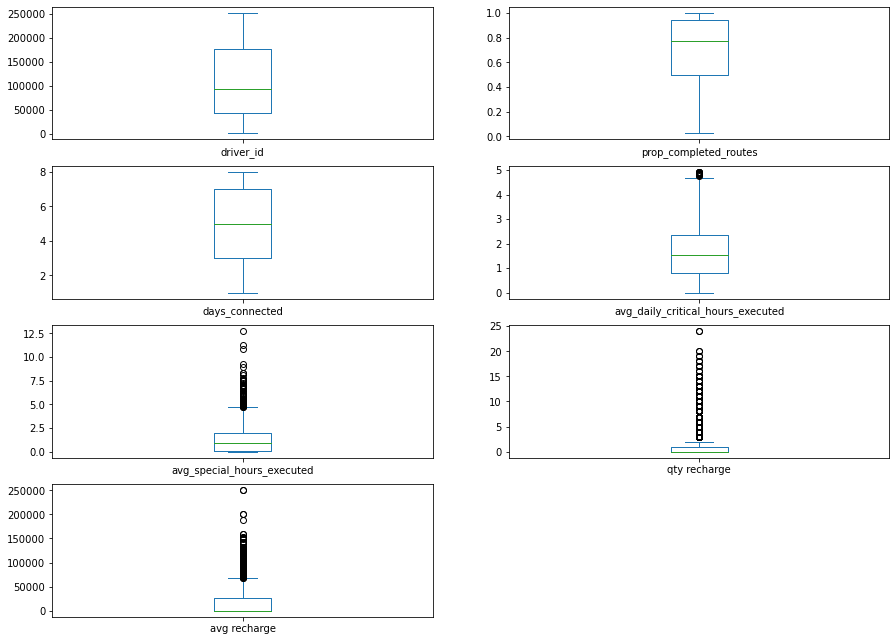

In [6]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [7]:
data.describe()

,driver_id,prop_completed_routes,days_connected,avg_daily_critical_hours_executed,avg_special_hours_executed,qty recharge,avg recharge
count,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000
mean,107644.108907,0.702219,4.856804,1.660623,1.244353,1.284667,16385.230705
std,75979.937452,0.266546,2.253696,1.072316,1.288264,2.747508,28833.054094
min,151.000000,0.023256,1.000000,0.000000,0.000000,0.000000,0.000000
25%,43283.000000,0.500000,3.000000,0.817778,0.105238,0.000000,0.000000
50%,93518.000000,0.769231,5.000000,1.512857,0.925794,0.000000,0.000000
75%,176522.000000,0.944444,7.000000,2.368333,1.956019,1.000000,27500.000000
max,251550.000000,1.000000,8.000000,4.916944,12.725278,24.000000,250000.000000


In [8]:
#check for null values

nan_percentage = data.isna().sum() * 100 / len(data)
missing_percentage_df = pd.DataFrame({'column_name': data.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

,column_name,percent_missing
0,driver_id,0.0
1,logistic_region,0.0
2,prop_completed_routes,0.0
3,days_connected,0.0
4,avg_daily_critical_hours_executed,0.0
5,avg_special_hours_executed,0.0
6,qty recharge,0.0
7,avg recharge,0.0
8,date_partition,0.0


### Balancear Variables

In [9]:
# data.loc[data['speed']>=40,'speed']=data['speed'].mean()
# data.loc[data['avg_daily_utr']>3,'avg_daily_utr']=data['avg_daily_utr'].mean()
data.loc[data['avg recharge']>((data['avg recharge'].std())*3),'avg recharge']=data['avg recharge'].mean()
# data.loc[data['prop_critical_delay']>=((data['prop_critical_delay'].std())*3), 'prop_critical_delay']=data['prop_critical_delay'].mean()
data.loc[data['qty recharge']>=((data['qty recharge'].std())*3),'qty recharge']=data['qty recharge'].mean()
data.loc[data['avg_daily_critical_hours_executed']>=((data['avg_daily_critical_hours_executed'].std())*3),'avg_daily_critical_hours_executed']=data['avg_daily_critical_hours_executed'].mean()
data.loc[data['avg_special_hours_executed']>=((data['avg_special_hours_executed'].std())*3),'avg_special_hours_executed']=data['avg_special_hours_executed'].mean()
# data.loc[data['avg_total_hours_executed']>=((data['avg_total_hours_executed'].std())*3),'avg_total_hours_executed']=data['avg_total_hours_executed'].mean()

In [10]:
data.describe()

,driver_id,prop_completed_routes,days_connected,avg_daily_critical_hours_executed,avg_special_hours_executed,qty recharge,avg recharge
count,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000
mean,107644.108907,0.702219,4.856804,1.453309,1.102892,0.903101,13724.066196
std,75979.937452,0.266546,2.253696,0.809364,1.016697,1.774637,23358.866394
min,151.000000,0.023256,1.000000,0.000000,0.000000,0.000000,0.000000
25%,43283.000000,0.500000,3.000000,0.817778,0.105238,0.000000,0.000000
50%,93518.000000,0.769231,5.000000,1.512857,0.925794,0.000000,0.000000
75%,176522.000000,0.944444,7.000000,1.991250,1.761071,1.000000,20000.000000
max,251550.000000,1.000000,8.000000,3.216620,3.857130,8.000000,86400.000000


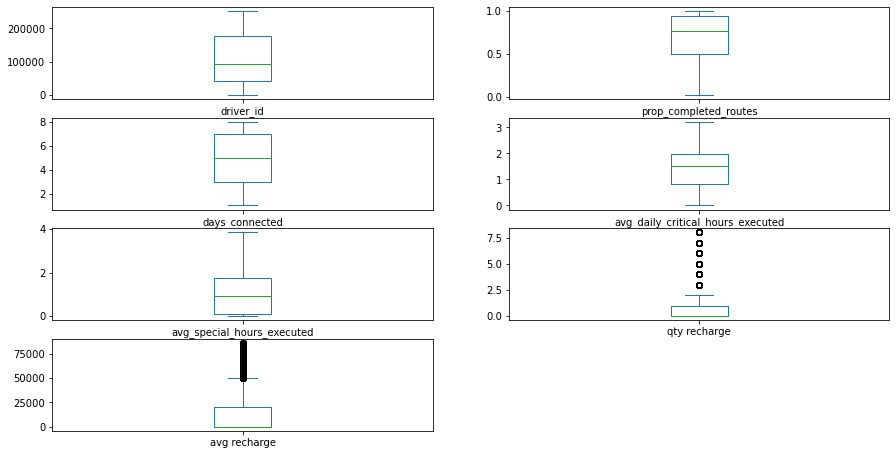

In [11]:
data.plot(kind="box",subplots=True,layout=(10,2),figsize=(15,20));

In [12]:
# data['% no negative wallet'].std()*-3

In [13]:
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x=data["% no negative wallet"])

In [14]:
# test = data[~(data['avg_daily_critical_hours_executed'] >= 4)]
# print(f"{len(data[(data['avg_daily_critical_hours_executed'] >= 4)])}")

# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x=test["avg_daily_critical_hours_executed"])

In [15]:
# data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [16]:
df = data
df = df.drop_duplicates(['driver_id'])
city = df[['driver_id', 'logistic_region', 'date_partition']]
df = df.set_index(['driver_id'])

In [17]:
# df = df.drop(['logistic_region', 'date_partition'], axis = 1)

In [18]:
# scaled_features = MinMaxScaler().fit_transform(df.values)
# scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.select_dtypes(exclude=['object']).columns)
# scaled_features_df

In [19]:
# pd.DataFrame(scaled_features_df.skew(axis=0))

In [20]:
# df = scaled_features_df.drop(['strikes', 'consumer_evaluation'], axis=1)

In [21]:
# df = df.merge(city, left_on='driver_id', right_on = 'driver_id')

In [22]:
dict_scaler = {}

In [23]:
reducer = umap.UMAP()

In [24]:
def process(data, dict_scaler, reducer): #output_data_path
    '''
    The function to execute the processing job.
    :param data: [pandas.DataFrame]
    :param model_path: [str], directory path to load your model(s)
    '''
    
    #dt = datetime.now().strftime('%Y%m%d')

    features = [
#                 'prop_critical_delay',
#                 'driver_delay_origin',
#                 'speed',
                'prop_completed_routes',
                'days_connected',
                'avg_daily_critical_hours_executed',
                'avg_special_hours_executed',
#                 'avg_total_hours_executed',
#                 'strikes',
                'qty recharge',
                'avg recharge',
#                 '% no negative wallet',
#                 'avg_daily_utr',
#                 'consumer_evaluation'
                ]

    regions = sorted(df['logistic_region'].unique())
    new_regions = [x for x in regions if x not in dict_scaler.keys()]

    if len(new_regions) > 0:

        for x in new_regions:
            print('Scaling data for regions:', new_regions)
            scaler = MinMaxScaler()
            Xf     = df[df['logistic_region'] == x][features].copy()
            dict_scaler[x] = scaler.fit(Xf)

        # dump(dict_scaler, os.path.join(model_path, 'dict_scaler_' + dt + '.pkl'))
    else:
        print('There is no new regions')

    # Scale data by region
    data_group  = df.groupby('logistic_region', as_index = False)
    data_scaled = []

    for i, gr in data_group:
        
        scaler = dict_scaler[i]
        gr_scaled = scaler.transform(gr[features])
        gr_scaled = pd.DataFrame(gr_scaled, columns = features, index = gr.index)
        data_scaled.append(gr_scaled)

    data_scaled = pd.concat(data_scaled)
    data_scaled = data_scaled.dropna()
#     data_scaled = df

    # reduce dimensionality
    data_reduced = reducer.fit_transform(data_scaled)
    data_reduced = pd.DataFrame(data_reduced, index = data_scaled.index)
    data_reduced.columns = ['c' + str(i) for i in range(1, data_reduced.shape[1] + 1)]

    # Saving files
    # print("Saving to {}".format(output_data_path))
    # data_scaled.to_parquet(os.path.join(output_data_path, 'data_scaled.parquet'))
    # data_reduced.to_parquet(os.path.join(output_data_path, 'data_reduced.parquet'))

    return data_reduced

In [25]:
data_reduced =  process(df, dict_scaler, reducer)

Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla'

In [26]:
data_reduced.head(20)

,c1,c2
driver_id,,
191,-5.029089,6.357678
638,-0.815187,-0.795677
1329,-0.912357,1.802200
2983,1.060046,15.798331
3519,-0.308718,12.718961
4187,-0.565227,16.419958
4894,-2.241295,4.237798
5005,-1.161823,4.620603
5240,1.130536,2.598756


In [27]:
# data_scaled = data_scaled.drop([('logistic_region','date_partition')], axis =1)

In [28]:
# data_reduced = reducer.fit_transform(data_scaled)
# data_reduced = pd.DataFrame(data_reduced, index = data_scaled.index)
# data_reduced.columns = ['c' + str(i) for i in range(1, data_reduced.shape[1] + 1)]

In [29]:
# data_reduced

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeanModel.fit(data_reduced)
    distortions.append(kmeanModel.inertia_)

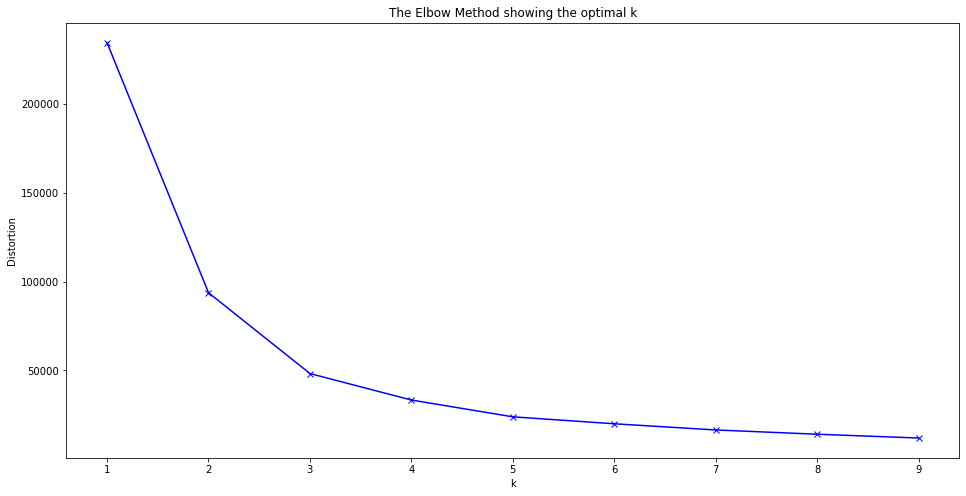

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.60693854
For n_clusters = 3 The average silhouette_score is : 0.5596432
For n_clusters = 4 The average silhouette_score is : 0.5690178
For n_clusters = 5 The average silhouette_score is : 0.54187566


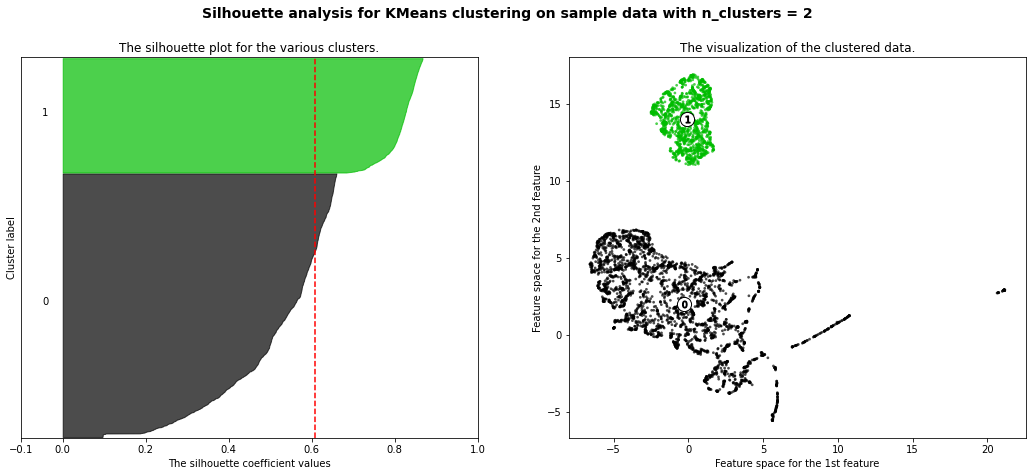

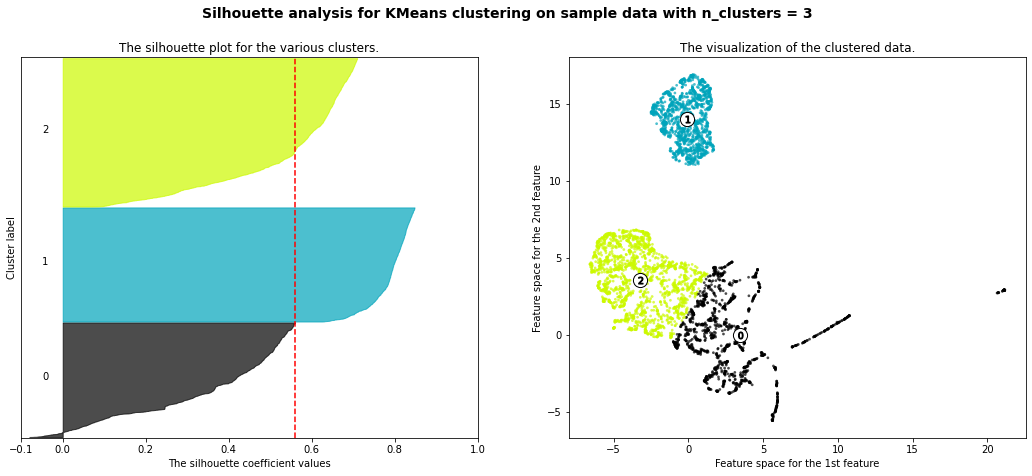

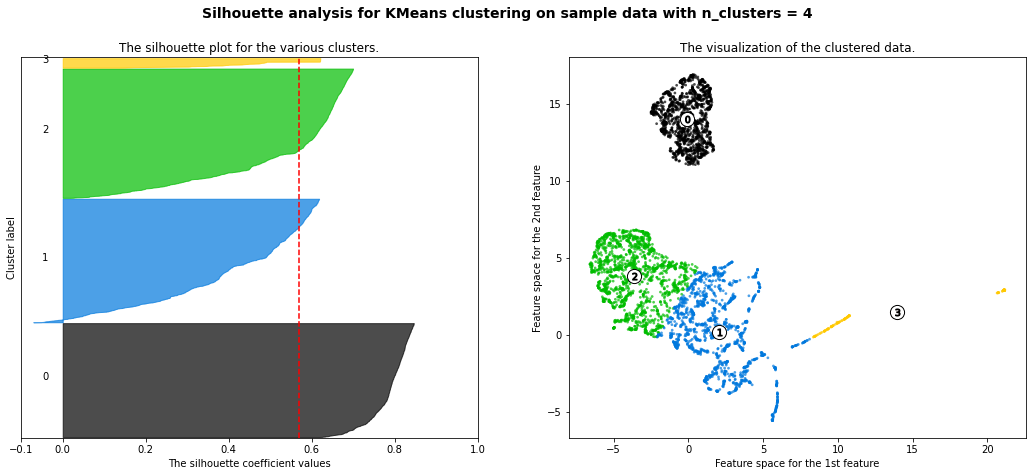

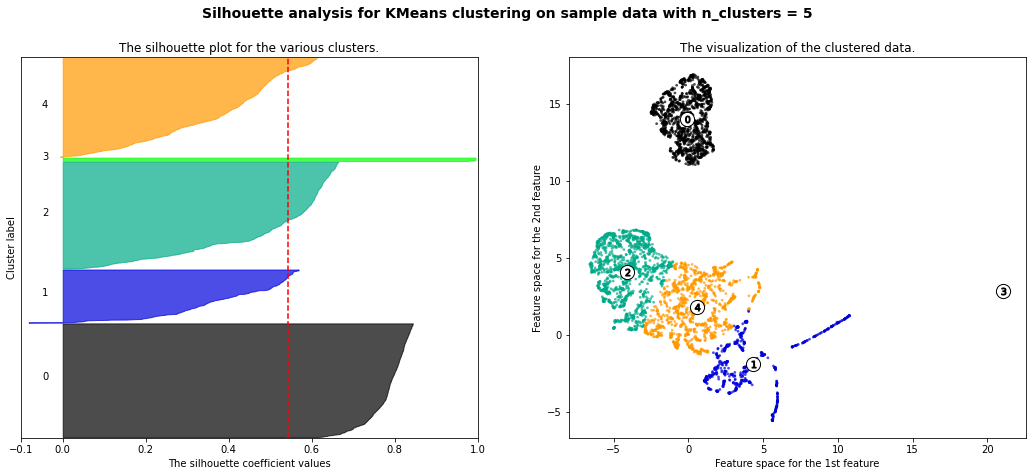

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_reduced.iloc[:, 0], data_reduced.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [33]:
kmeanModel=KMeans(n_clusters=2,n_init=20, random_state=42)
clusterer = kmeanModel.fit(data_reduced)

In [34]:
pred = clusterer.predict(data_reduced)

In [35]:
df

,logistic_region,prop_completed_routes,days_connected,avg_daily_critical_hours_executed,avg_special_hours_executed,qty recharge,avg recharge,date_partition
driver_id,,,,,,,,
191,Barranquilla,0.974359,7,1.617024,0.357698,0.0,0.0000,2022-08-22
570,Cali,0.771930,8,2.565729,1.924028,6.0,78333.3333,2022-08-22
638,Barranquilla,0.333333,4,0.288056,0.000000,0.0,0.0000,2022-08-22
1041,Monteria,1.000000,3,0.948796,1.224537,2.0,25000.0000,2022-08-22
1329,Barranquilla,0.400000,3,1.898519,1.244353,0.0,0.0000,2022-08-22
...,...,...,...,...,...,...,...,...
249031,Bogota,0.583333,6,1.611944,0.536111,0.0,0.0000,2022-08-22
249260,Bogota,0.934783,6,2.303194,2.593148,6.0,26666.6667,2022-08-22
250601,Santa Marta,0.761905,4,0.298264,0.540694,0.0,0.0000,2022-08-22


In [36]:
len(data_reduced)

4636

In [37]:
response= {'driver_id': data_reduced.index, "segmentation": pred, "date_partition": df['date_partition']}
response = pd.DataFrame(response)
response['segmentation'] = response['segmentation'].astype(str)
response['segmentation'] = response['segmentation'].replace({'0': 'A',
		'1': 'B'})

In [38]:
response['segmentation'].value_counts()

A    3233
B    1403
Name: segmentation, dtype: int64

In [39]:
response.reset_index(drop = True, inplace = True)
df = pd.merge(data, response, on="driver_id")

In [40]:
df.groupby("segmentation").mean().T

segmentation,A,B
driver_id,108318.209338,106090.266572
prop_completed_routes,0.646191,0.831368
days_connected,4.307050,6.124020
avg_daily_critical_hours_executed,1.288277,1.833716
avg_special_hours_executed,0.863711,1.654218
qty recharge,0.016167,2.947536
avg recharge,250.516700,44781.414072


In [41]:
    features = [
#                 'prop_critical_delay',
#                 'driver_delay_origin',
#                 'speed',
                'prop_completed_routes',
                'days_connected',
                'avg_daily_critical_hours_executed',
                'avg_special_hours_executed',
#                 'avg_total_hours_executed',
#                 'strikes',
                'qty recharge',
                'avg recharge',
#                 '% no negative wallet',
#                 'avg_daily_utr',
#                 'consumer_evaluation'
                ]

[0.02992697 0.03682583 0.01532383 0.0237559  0.44212758 0.45203989]


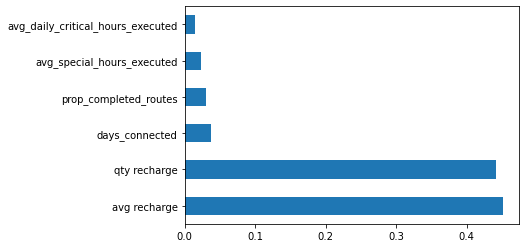

In [42]:
X = df[features] 
y = df['segmentation']  
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

<AxesSubplot:>

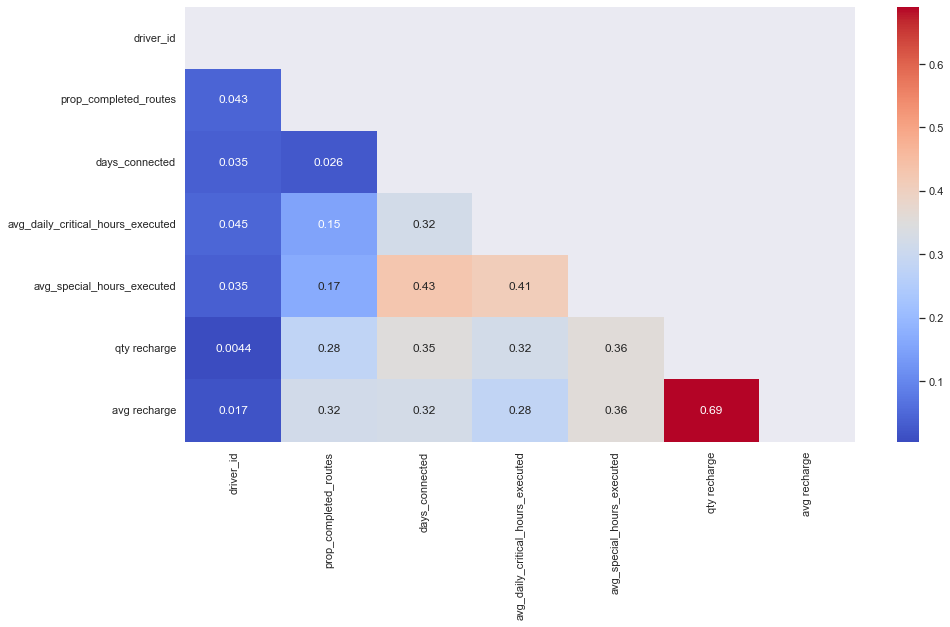

In [43]:
corr=df.corr()
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask)

### SUBSEGMENTATION A

In [44]:
data_A=df[df["segmentation"]=="A"]

In [45]:
len(data_A)

3234

In [46]:
df_A = data_A.set_index('driver_id')

In [47]:
dict_scaler = {}
reducer = umap.UMAP(random_state=42)

regions = sorted(df_A['logistic_region'].unique())
new_regions = [x for x in regions if x not in dict_scaler.keys()]

if len(new_regions) > 0:

    for x in new_regions:
        print('Scaling data for regions:', new_regions)
        scaler = StandardScaler()
        Xf     = df_A[df_A['logistic_region'] == x][features].copy()
        dict_scaler[x] = scaler.fit(Xf)

        # dump(dict_scaler, os.path.join(model_path, 'dict_scaler_' + dt + '.pkl'))
else:
    print('There is no new regions')

    # Scale data by region
data_group  = df_A.groupby('logistic_region', as_index = False)
data_scaled = []


for i, gr in data_group:
        
    scaler = dict_scaler[i]
    gr_scaled = scaler.transform(gr[features])
    gr_scaled = pd.DataFrame(gr_scaled, columns = features, index = gr.index)
    data_scaled.append(gr_scaled)

data_scaled = pd.concat(data_scaled)
data_scaled = data_scaled.dropna()

# from sklearn.decomposition import PCA
# pca = PCA()
# reduce dimensionality
data_reduced = reducer.fit_transform(data_scaled)
# data_reduced = pca.fit_transform(data_scaled)
data_reduced1 = pd.DataFrame(data_reduced, index = data_scaled.index)
data_reduced1.columns = ['c' + str(i) for i in range(1, data_reduced1.shape[1] + 1)]


Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla'

In [48]:
data_reduced_A=data_reduced1

In [49]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeanModel.fit(data_reduced_A)
    distortions.append(kmeanModel.inertia_)

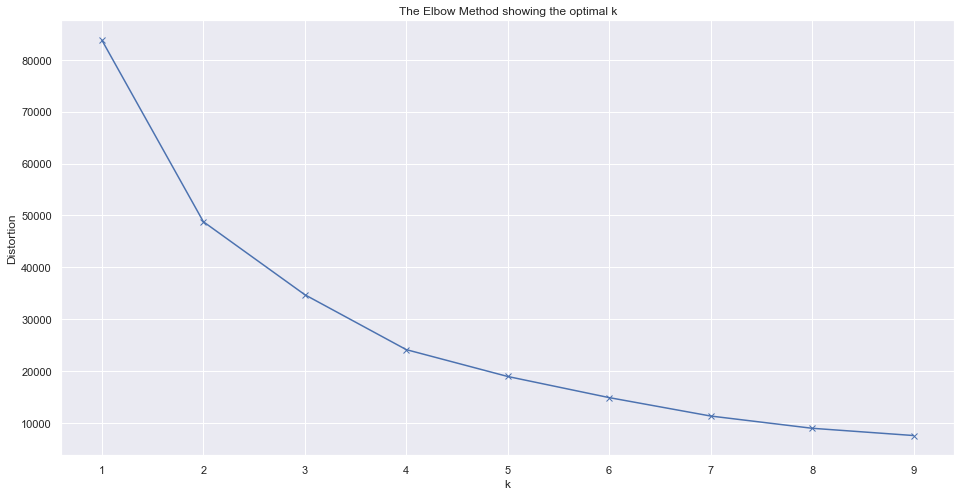

In [50]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.41118157
For n_clusters = 3 The average silhouette_score is : 0.40903187
For n_clusters = 4 The average silhouette_score is : 0.4370719
For n_clusters = 5 The average silhouette_score is : 0.3895657


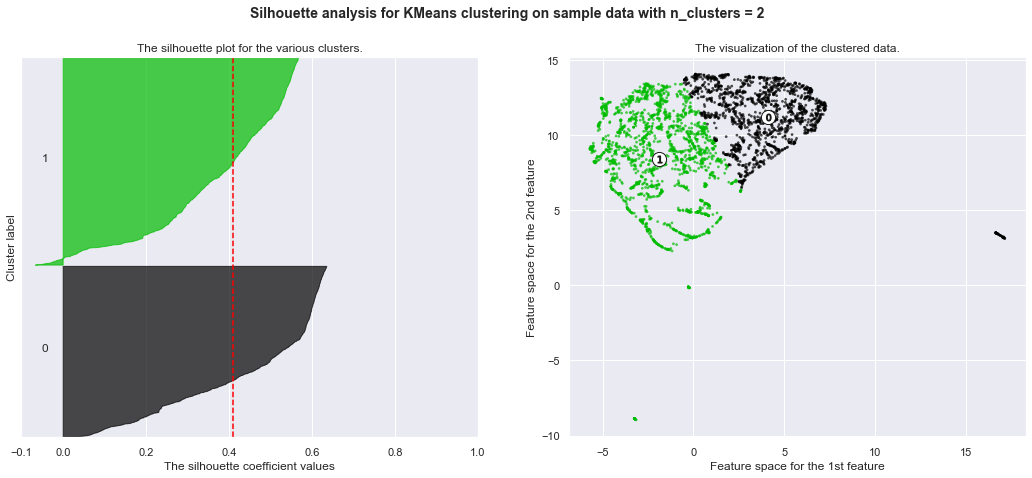

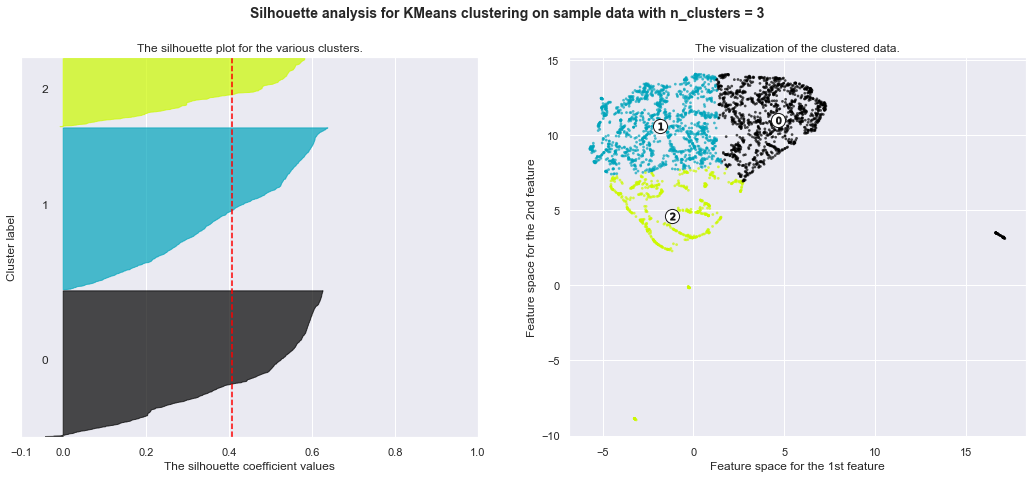

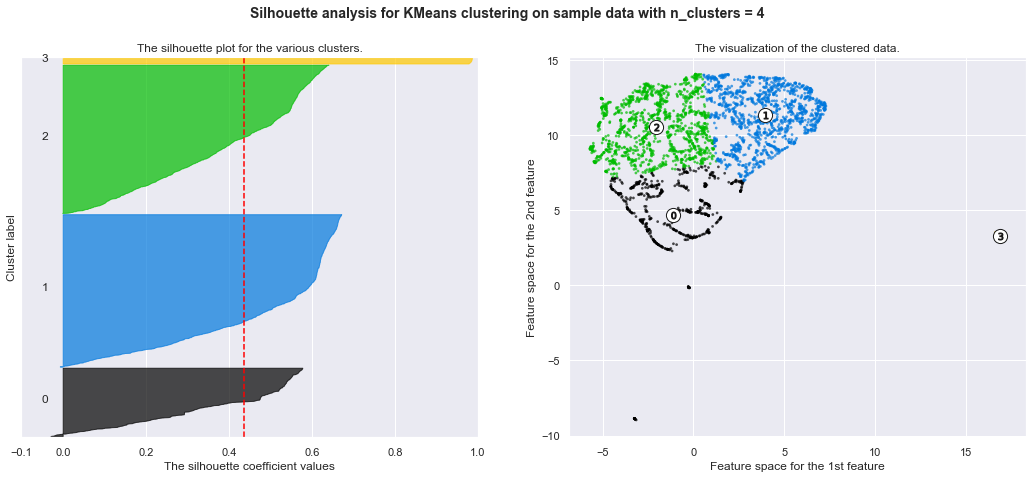

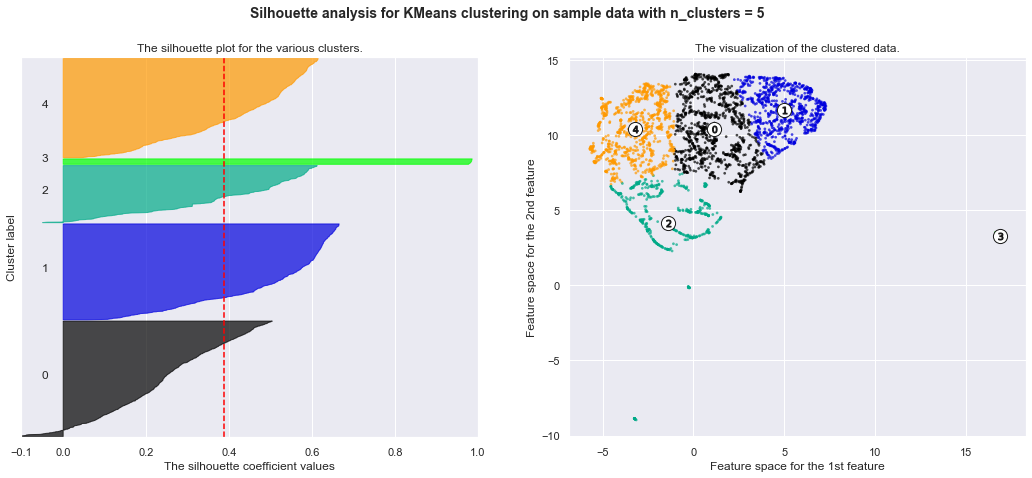

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced_A) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_reduced_A)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced_A, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced_A, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_reduced_A.iloc[:, 0], data_reduced_A.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [52]:
kmeanModel=KMeans(n_clusters=4, n_init=20, random_state=42)
clusterer_A = kmeanModel.fit(data_reduced_A)

In [53]:
pred = clusterer_A.predict(data_reduced_A)

In [54]:
response_A= {'driver_id': data_reduced_A.index, "subsegmentation": pred, "date_partition": df_A['date_partition_x']}
response_A = pd.DataFrame(response_A)
response_A['subsegmentation'] = response_A['subsegmentation'].astype(str)
response_A['subsegmentation'] = response_A['subsegmentation'].replace({'0': 'AA',
		'1': 'AB',
		'2': 'AC',
		'3': 'AD'})

In [55]:
response_A['subsegmentation'].value_counts()

AB    1315
AC    1280
AA     591
AD      48
Name: subsegmentation, dtype: int64

In [56]:
response_A.reset_index(drop = True, inplace = True)
df_A = pd.merge(df_A, response_A, on="driver_id")

In [57]:
df_A.groupby("subsegmentation").mean().T

subsegmentation,AA,AB,AC,AD
driver_id,110830.974619,111101.087452,104544.753510,102958.479167
prop_completed_routes,0.969035,0.629828,0.513363,0.660985
days_connected,2.536379,5.203042,4.235569,3.375000
avg_daily_critical_hours_executed,1.005930,1.711272,0.977011,1.490400
avg_special_hours_executed,0.151755,1.674026,0.326948,1.730482
qty recharge,0.000000,0.000000,0.000000,1.089264
avg recharge,0.000000,0.000000,0.000000,16878.562660


### SUBSEGMENTATION B

In [58]:
data_B=df[df["segmentation"]=="B"]

In [59]:
df_B = data_B.set_index('driver_id')

In [60]:
dict_scaler = {}
reducer = umap.UMAP(random_state=42)

regions = sorted(df_B['logistic_region'].unique())
new_regions = [x for x in regions if x not in dict_scaler.keys()]

if len(new_regions) > 0:

    for x in new_regions:
        print('Scaling data for regions:', new_regions)
        scaler = StandardScaler()
        Xf     = df_B[df_B['logistic_region'] == x][features].copy()
        dict_scaler[x] = scaler.fit(Xf)

        # dump(dict_scaler, os.path.join(model_path, 'dict_scaler_' + dt + '.pkl'))
else:
    print('There is no new regions')

    # Scale data by region
data_group  = df_B.groupby('logistic_region', as_index = False)
data_scaled = []


for i, gr in data_group:
        
    scaler = dict_scaler[i]
    gr_scaled = scaler.transform(gr[features])
    gr_scaled = pd.DataFrame(gr_scaled, columns = features, index = gr.index)
    data_scaled.append(gr_scaled)

data_scaled = pd.concat(data_scaled)
data_scaled = data_scaled.dropna()

# from sklearn.decomposition import PCA
# pca = PCA()
# reduce dimensionality
data_reduced = reducer.fit_transform(data_scaled)
# data_reduced = pca.fit_transform(data_scaled)
data_reduced1 = pd.DataFrame(data_reduced, index = data_scaled.index)
data_reduced1.columns = ['c' + str(i) for i in range(1, data_reduced1.shape[1] + 1)]

Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla', 'Bogota', 'Cali', 'Manizales', 'Monteria', 'Palmira', 'Santa Marta', 'Soledad', 'Valledupar']
Scaling data for regions: ['Barranquilla'

In [61]:
data_reduced_B=data_reduced1

In [62]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeanModel.fit(data_reduced_B)
    distortions.append(kmeanModel.inertia_)

C:\Users\daniel.gallo_ifood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


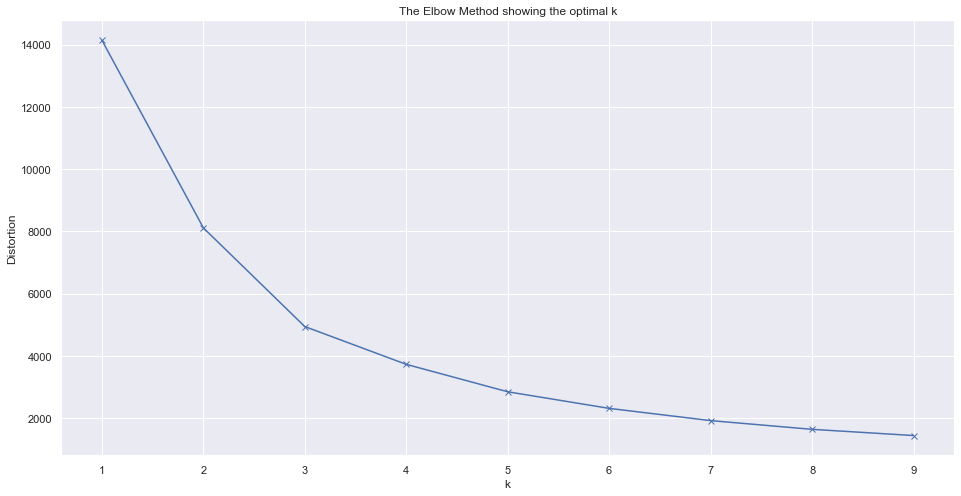

In [63]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.38636667
For n_clusters = 3 The average silhouette_score is : 0.41955104
For n_clusters = 4 The average silhouette_score is : 0.38873765
For n_clusters = 5 The average silhouette_score is : 0.38339388


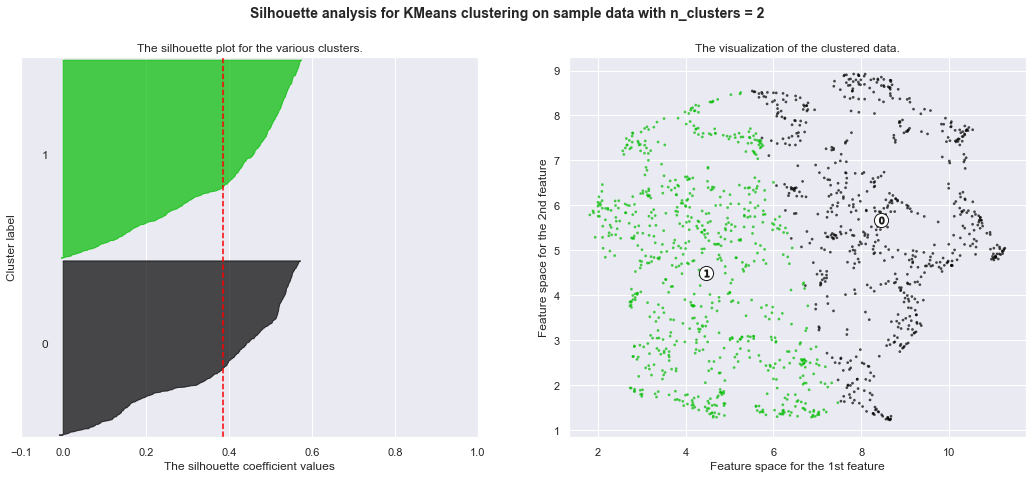

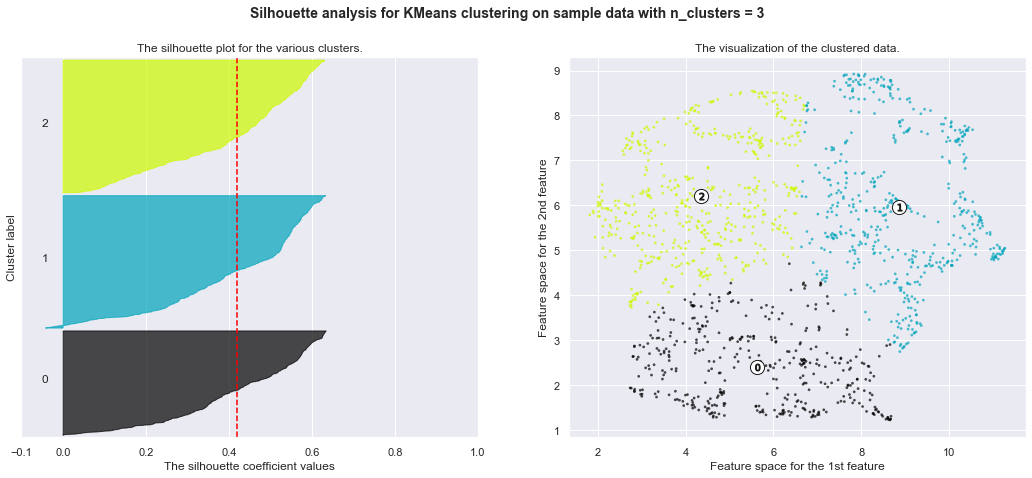

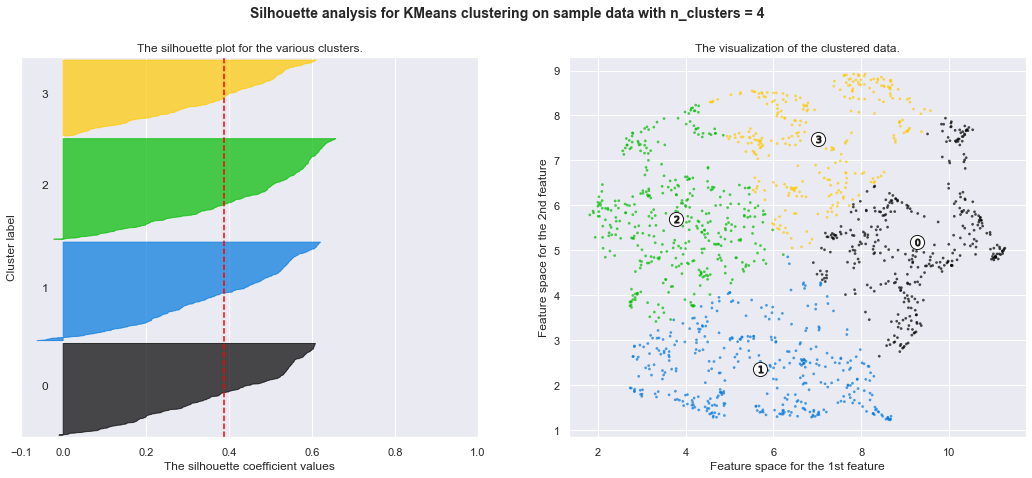

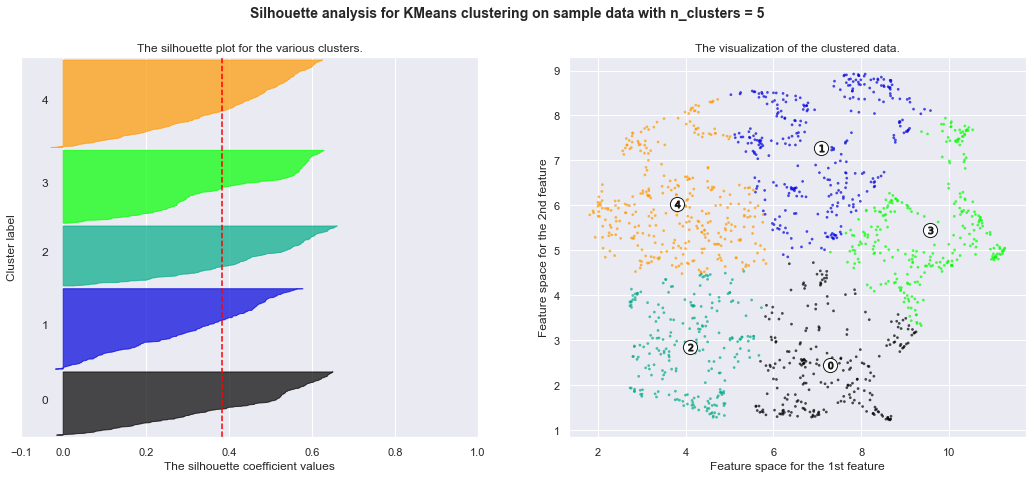

In [64]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced_B) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_reduced_B)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced_B, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced_B, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_reduced_B.iloc[:, 0], data_reduced_B.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [65]:
kmeanModel=KMeans(n_clusters=3, n_init=20, random_state=42)
clusterer_B = kmeanModel.fit(data_reduced_B)

In [66]:
pred = clusterer_B.predict(data_reduced_B)

In [68]:
response_B= {'driver_id': data_reduced_B.index, "subsegmentation": pred, "date_partition": df_B['date_partition_x']}
response_B = pd.DataFrame(response_B)
response_B['subsegmentation'] = response_B['subsegmentation'].astype(str)
response_B['subsegmentation'] = response_B['subsegmentation'].replace({'0': 'BA',
		'1': 'BB', '2':'BC'})

In [69]:
response_B['subsegmentation'].value_counts()

BC    504
BA    503
BB    396
Name: subsegmentation, dtype: int64

In [70]:
response_B.reset_index(drop = True, inplace = True)
df_B = pd.merge(df_B, response_B, on="driver_id")

In [71]:
df_B.groupby("subsegmentation").mean().T

subsegmentation,BA,BB,BC
driver_id,114715.614314,100574.229798,101816.061508
prop_completed_routes,0.884591,0.898240,0.725707
days_connected,7.300199,5.194444,5.680556
avg_daily_critical_hours_executed,2.016300,1.904768,1.595668
avg_special_hours_executed,2.308195,1.516573,1.109687
qty recharge,4.675218,2.168325,1.835520
avg recharge,44743.585810,62955.928098,30539.191971


In [72]:
pd.DataFrame(df.skew(axis=0))

C:\Users\DANIEL~1.GAL\AppData\Local\Temp/ipykernel_15384/4008468014.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.skew(axis=0))


,0
driver_id,0.332040
prop_completed_routes,-0.616198
days_connected,-0.139070
avg_daily_critical_hours_executed,0.132068
avg_special_hours_executed,0.712117
qty recharge,2.289519
avg recharge,1.505014


In [73]:
df_final = df_A.append(df_B,ignore_index=True)

In [74]:
df_final

,driver_id,logistic_region,prop_completed_routes,days_connected,avg_daily_critical_hours_executed,avg_special_hours_executed,qty recharge,avg recharge,date_partition_x,segmentation,date_partition_y,subsegmentation,date_partition
0,191,Barranquilla,0.974359,7,1.617024,0.357698,0.000000,0.0000,2022-08-22,A,2022-08-22,AB,2022-08-22
1,638,Barranquilla,0.333333,4,0.288056,0.000000,0.000000,0.0000,2022-08-22,A,2022-08-22,AC,2022-08-22
2,1329,Barranquilla,0.400000,3,1.898519,1.244353,0.000000,0.0000,2022-08-22,A,2022-08-22,AB,2022-08-22
3,1905,Cali,0.500000,1,1.660623,0.000000,0.000000,0.0000,2022-08-22,A,2022-08-22,AC,2022-08-22
4,2041,Cali,0.333333,5,0.110111,0.066056,0.000000,0.0000,2022-08-22,A,2022-08-22,AC,2022-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,244933,Barranquilla,1.000000,6,3.113565,1.838611,2.000000,25000.0000,2022-08-22,B,2022-08-22,BC,2022-08-22
4635,247129,Santa Marta,0.450000,8,0.685451,1.152431,1.000000,20000.0000,2022-08-22,B,2022-08-22,BC,2022-08-22
4636,248191,Barranquilla,0.854167,8,1.994549,3.514618,5.000000,68400.0000,2022-08-22,B,2022-08-22,BA,2022-08-22
4637,248526,Bogota,0.871429,7,1.660623,3.149921,1.284667,39916.6667,2022-08-22,B,2022-08-22,BA,2022-08-22


In [75]:
df_final.groupby("subsegmentation").mean().T

subsegmentation,AA,AB,AC,AD,BA,BB,BC
driver_id,110830.974619,111101.087452,104544.753510,102958.479167,114715.614314,100574.229798,101816.061508
prop_completed_routes,0.969035,0.629828,0.513363,0.660985,0.884591,0.898240,0.725707
days_connected,2.536379,5.203042,4.235569,3.375000,7.300199,5.194444,5.680556
avg_daily_critical_hours_executed,1.005930,1.711272,0.977011,1.490400,2.016300,1.904768,1.595668
avg_special_hours_executed,0.151755,1.674026,0.326948,1.730482,2.308195,1.516573,1.109687
qty recharge,0.000000,0.000000,0.000000,1.089264,4.675218,2.168325,1.835520
avg recharge,0.000000,0.000000,0.000000,16878.562660,44743.585810,62955.928098,30539.191971


In [ ]:

1 
2 
3 nuevos
4 
5 Reactivados
6 
7 
